# Check the distribution of the sementic 

In [442]:
cd emo

/workspace/users/aiwei/emo


In [440]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load embedding norm

In [412]:
embeddingNorm = {}

fin = open("svr/embedding/win_log_line2")
for line in fin:
    line = line.split()
    embeddingNorm[int(line[0])] = np.sqrt(np.sum(np.array([float(x) for x in line[1:]])**2))
fin.close()

In [413]:
def load_neighbor_df(embedding):
    distDF = pd.read_csv("svr/emoji_stats/dist/" + embedding, sep="\t")
    freqDF = pd.read_csv("svr/emoji_stats/freq/" + embedding, sep="\t")

    df = distDF.merge(freqDF, left_on="neighbor_id", right_on="token_id")\
        .drop("token_id", axis=1).rename(columns={'count': 'neighbor_freq'})\
        .groupby(['emoji_id', 'neighbor_type'])\
        .agg({'distance':['min', 'mean', 'max'], 
              'neighbor_freq':['min', 'mean', 'max']})\
        .reset_index().pivot(index = 'emoji_id', columns = 'neighbor_type')

    df.columns = ['dist_min_emoji', 'dist_min_emoticon', 'dist_min_word',
                  'dist_avg_emoji', 'dist_avg_emoticon', 'dist_avg_word',
                  'dist_max_emoji', 'dist_max_emoticon', 'dist_max_word',
                  'freq_min_emoji', 'freq_min_emoticon', 'freq_min_word',
                  'freq_avg_emoji', 'freq_avg_emoticon', 'freq_avg_word',
                  'freq_max_emoji', 'freq_max_emoticon', 'freq_max_word']

    df = df.reset_index().merge(freqDF, left_on='emoji_id', right_on='token_id').drop('token_id', axis=1)\
        .rename(columns={'count': 'emoji_freq'})

    df['logfreq_emoji'] = np.log(df.emoji_freq)

    egoDF = pd.read_csv("svr/emoji_stats/ego10/" + embedding, sep = "\t")
    egoDF.columns = ['emoji_id', 'degree', 'lcc']
    df = df.merge(egoDF,on='emoji_id')
    
    for col in ['freq_min_emoji', 'freq_min_emoticon', 'freq_min_word',
            'freq_avg_emoji', 'freq_avg_emoticon', 'freq_avg_word',
            'freq_max_emoji', 'freq_max_emoticon', 'freq_max_word']:
        df['log' + col] = np.log(df[col])
    
    return df

In [415]:
dfall = load_neighbor_df("win_log_line2")

In [425]:
dfall['embeddingNorm'] = dfall.emoji_id.apply(lambda x:embeddingNorm[x])

## see the norm

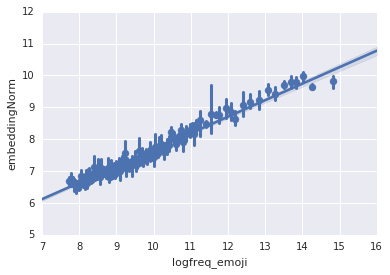

In [433]:
sns.regplot('logfreq_emoji', 'embeddingNorm', dfall, x_bins = 100)

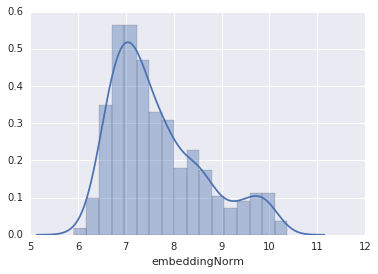

In [438]:
sns.distplot(dfall.embeddingNorm)

## Checking

In [447]:
df = pd.read_csv("svr/s3/vec_shift/win_log_line2/95", sep = " ", header = None).drop(0, axis=1)

In [448]:
df.columns = ['length', 'cnt', 'uniqEmoji', 'origNorm', 'newNorm', 'shiftDist']

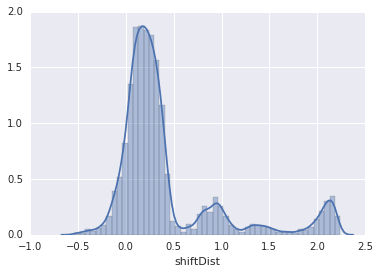

In [463]:
sns.distplot(np.log(df[(df.length == 5)].shiftDist))

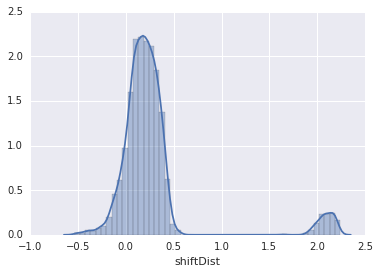

In [464]:
sns.distplot(np.log(df[(df.length == 5) & (df.uniqEmoji == 1)].shiftDist))

In [466]:
?sns.distplot(np.log(df[(df.length == 5) & (df.uniqEmoji == 2)].shiftDist))

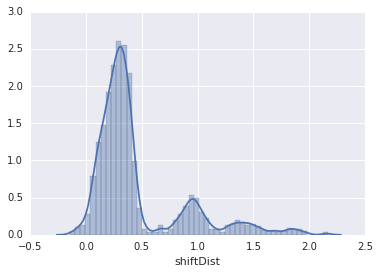

In [462]:
sns.distplot(np.log(df[(df.length == 5) & (df.cnt == 1)].shiftDist))

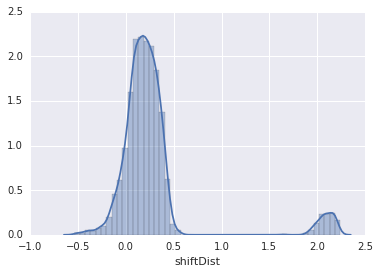

In [461]:
sns.distplot(np.log(df[(df.length == 5) & (df.uniqEmoji == 1)].shiftDist))

In [ ]:
sns.distplot(df[(df.length == 5) & (df.uniqEmoji == 1)].shiftDist)

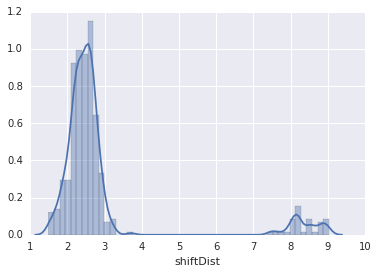

In [458]:
sns.distplot(df[(df.length == 5) & (df.uniqEmoji == 2)].shiftDist)

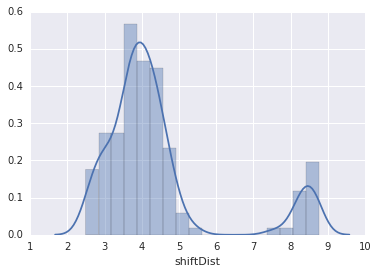

In [459]:
sns.distplot(df[(df.length == 5) & (df.uniqEmoji == 3)].shiftDist)

In [58]:
df832 = pd.read_csv("svr/s3/vec_shift/win_log_line2/832", sep = " ", header = None).drop(0, axis=1)

In [70]:
df832.columns = ['length', 'cnt', 'vec_shift']

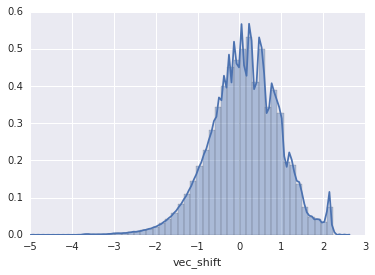

In [405]:
sns.distplot(np.log(df832.vec_shift))

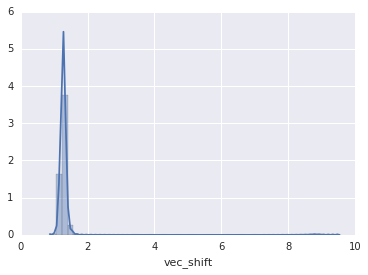

In [71]:
sns.distplot(df832[(df832.length == 5) & (df832.cnt == 1)].vec_shift)

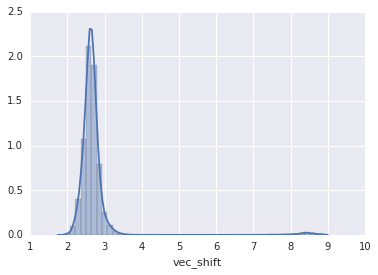

In [72]:
sns.distplot(df832[(df832.length == 5) & (df832.cnt == 2)].vec_shift)

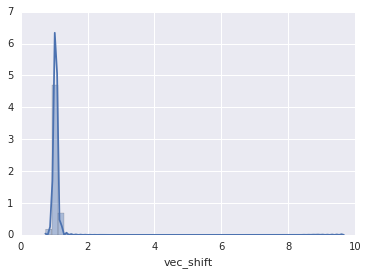

In [73]:
sns.distplot(df832[(df832.length == 6) & (df832.cnt == 1)].vec_shift)

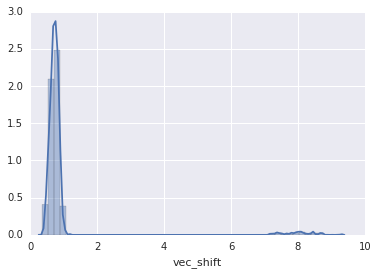

In [63]:
sns.distplot(df[(df.length == 8) & (df.cnt == 1)].vec_shift)

In [ ]:
df95 = pd.read_csv("svr/s3/vec_shift/win_log_line2/95", sep = " ", header = None).drop(0, axis=1)
df95.columns = ['length', 'cnt', 'vec_shift']

In [82]:
def loadDf(emojiId):
    df = pd.read_csv("svr/s3/vec_shift/win_log_line2/%d" % emojiId, sep = " ", header = None).drop(0, axis=1)
    df.columns = ['length', 'cnt', 'vec_shift']
    return df

In [77]:
def pltdiff(df, length, cnt):
    sns.distplot(df[(df.length == length) & (df.cnt == cnt)].vec_shift)

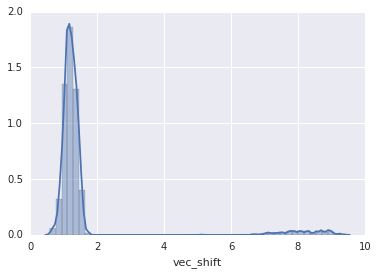

In [81]:
pltdiff(df95, 5, 1)

In [83]:
df385 = loadDf(385)

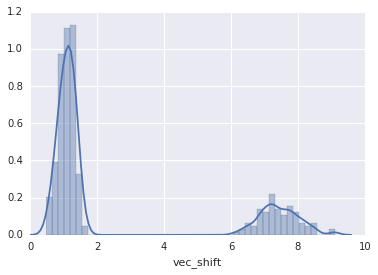

In [84]:
pltdiff(df385, 5, 1)

In [85]:
df909 = loadDf(909)

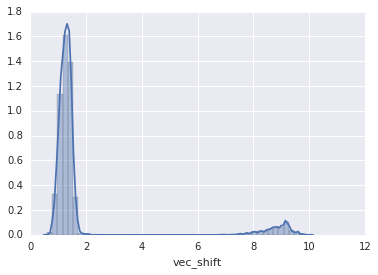

In [86]:
pltdiff(df909, 5, 1)

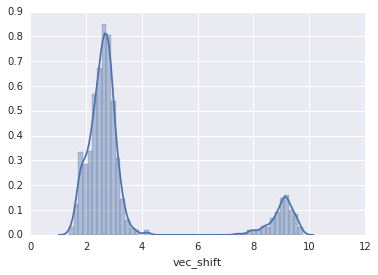

In [87]:
pltdiff(df909, 5, 2)

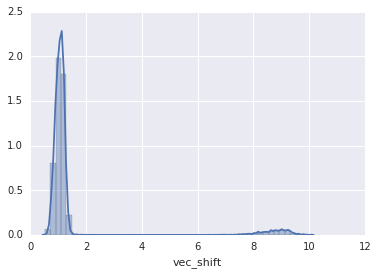

In [88]:
pltdiff(df909, 6, 1)

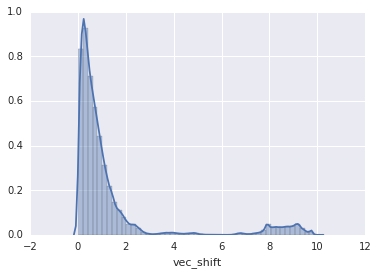

In [102]:
sns.distplot(df909[(df909.cnt == 1)].vec_shift)

In [92]:
df1263 = loadDf(1263)

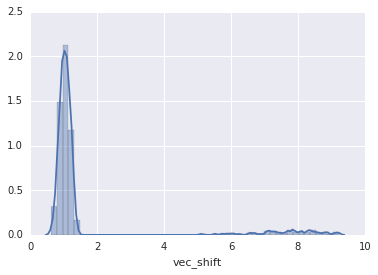

In [93]:
pltdiff(df1263, 6, 1)

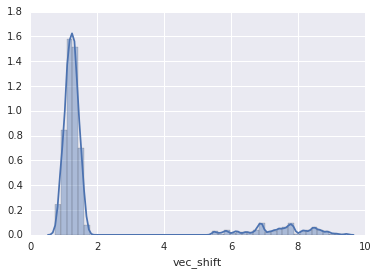

In [94]:
pltdiff(df1263, 5, 1)

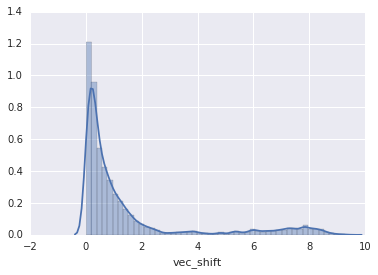

In [95]:
sns.distplot(df1263[(df1263.cnt == 1)].vec_shift)

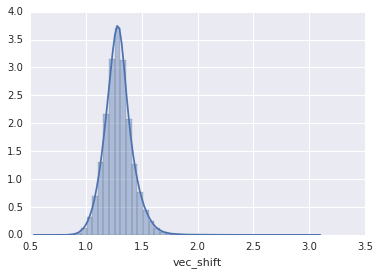

In [97]:
sns.distplot(df_1[(df_1.length == 5) & (df_1.cnt == 1)].vec_shift)

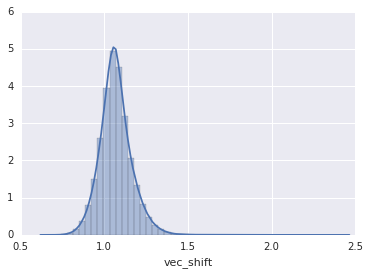

In [98]:
sns.distplot(df_1[(df_1.length == 6) & (df_1.cnt == 1)].vec_shift)

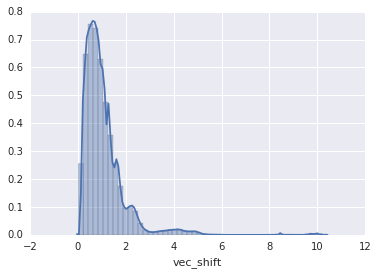

In [100]:
sns.distplot(df_1[(df_1.cnt == 1)].vec_shift)

## Calculate the proportion of the second gaussian mixture

In [5]:
x = df[(df.length == 5) & (df.cnt == 1)].vec_shift

In [9]:
from sklearn.mixture import GaussianMixture as GM

In [18]:
gm = GM(n_components=2).fit(np.asmatrix(x).T)

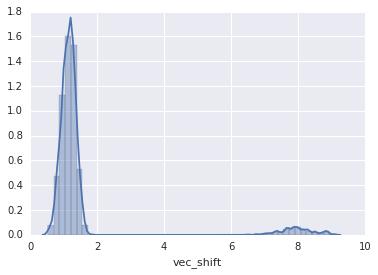

In [19]:
sns.distplot(x)

In [20]:
gm.means_

array([[ 1.14473732],
       [ 7.96205112]])

In [21]:
gm.weights_

array([ 0.93205742,  0.06794258])

In [22]:
def load_neighbor_df(embedding):
    distDF = pd.read_csv("svr/emoji_stats/dist/" + embedding, sep="\t")
    freqDF = pd.read_csv("svr/emoji_stats/freq/" + embedding, sep="\t")

    df = distDF.merge(freqDF, left_on="neighbor_id", right_on="token_id")\
        .drop("token_id", axis=1).rename(columns={'count': 'neighbor_freq'})\
        .groupby(['emoji_id', 'neighbor_type'])\
        .agg({'distance':['min', 'mean', 'max'], 
              'neighbor_freq':['min', 'mean', 'max']})\
        .reset_index().pivot(index = 'emoji_id', columns = 'neighbor_type')

    df.columns = ['dist_min_emoji', 'dist_min_emoticon', 'dist_min_word',
                  'dist_avg_emoji', 'dist_avg_emoticon', 'dist_avg_word',
                  'dist_max_emoji', 'dist_max_emoticon', 'dist_max_word',
                  'freq_min_emoji', 'freq_min_emoticon', 'freq_min_word',
                  'freq_avg_emoji', 'freq_avg_emoticon', 'freq_avg_word',
                  'freq_max_emoji', 'freq_max_emoticon', 'freq_max_word']

    df = df.reset_index().merge(freqDF, left_on='emoji_id', right_on='token_id').drop('token_id', axis=1)\
        .rename(columns={'count': 'emoji_freq'})

    df['logfreq_emoji'] = np.log(df.emoji_freq)

    egoDF = pd.read_csv("svr/emoji_stats/ego10/" + embedding, sep = "\t")
    egoDF.columns = ['emoji_id', 'degree', 'lcc']
    df = df.merge(egoDF,on='emoji_id')
    
    for col in ['freq_min_emoji', 'freq_min_emoticon', 'freq_min_word',
            'freq_avg_emoji', 'freq_avg_emoticon', 'freq_avg_word',
            'freq_max_emoji', 'freq_max_emoticon', 'freq_max_word']:
        df['log' + col] = np.log(df[col])
    
    return df

In [23]:
winlog2 = load_neighbor_df("win_log_line2")

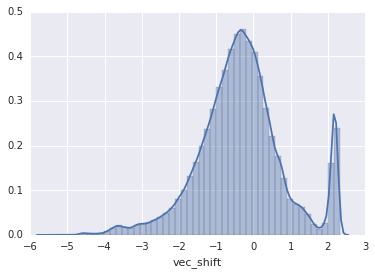

In [408]:
sns.distplot(np.log(load_shift_df(865).vec_shift))

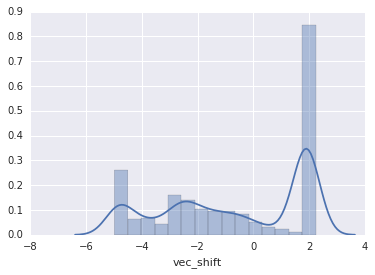

In [409]:
sns.distplot(np.log(load_shift_df(283).vec_shift))

In [407]:
def load_shift_df(emojiId):
    df = pd.read_csv("svr/s3/vec_shift/win_log_line2/%d" % emojiId, sep = " ", header = None).drop(0, axis=1)
    df.columns = ['length', 'cnt', 'vec_shift']
    return df

In [101]:
eid = 832

In [102]:
tdf = load_shift_df(eid)

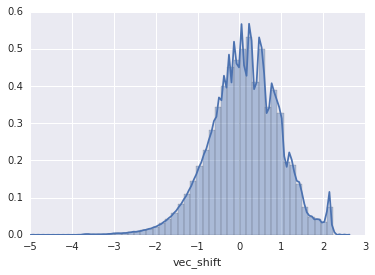

In [103]:
sns.distplot(np.log(tdf.vec_shift))

In [91]:
tdf.shape

(58727, 3)

In [92]:
gm = GM(n_components=2).fit(np.asmatrix(tdf.vec_shift).T)

In [93]:
gm.weights_

array([ 0.85504996,  0.14495004])

In [94]:
gm.means_

array([[ 0.93599545],
       [ 6.89076333]])

In [95]:
gm.covariances_

array([[[ 0.50170482]],

       [[ 3.11746231]]])

In [99]:
float(tdf[tdf.vec_shift>5].shape[0]) / tdf.shape[0]

0.11139680215233198

In [104]:
tdf = load_shift_df(1263)

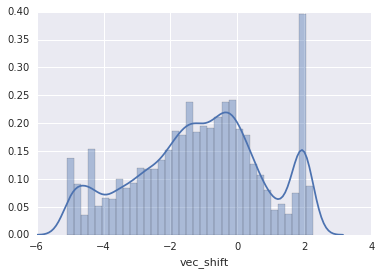

In [106]:
sns.distplot(np.log(load_shift_df(25).vec_shift))

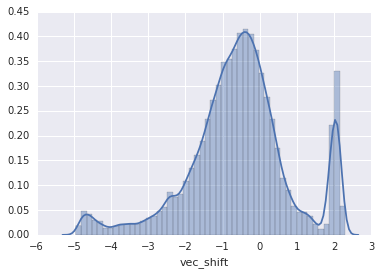

In [107]:
sns.distplot(np.log(load_shift_df(49).vec_shift))

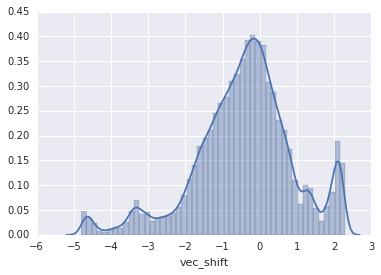

In [108]:
sns.distplot(np.log(load_shift_df(95).vec_shift))

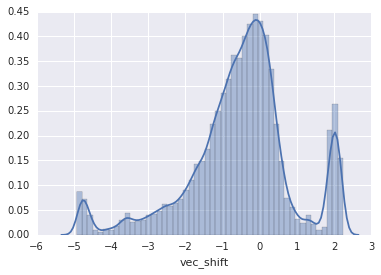

In [109]:
sns.distplot(np.log(load_shift_df(98).vec_shift))

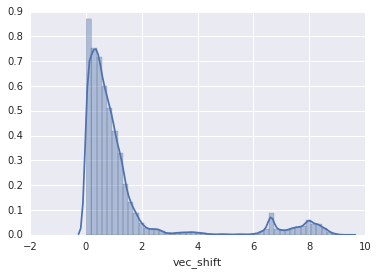

In [110]:
sns.distplot(load_shift_df(98).vec_shift)

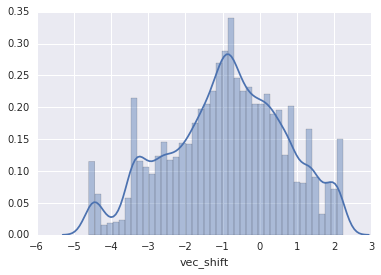

In [113]:
sns.distplot(np.log(load_shift_df(1).vec_shift))

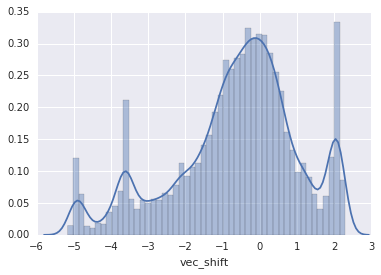

In [114]:
sns.distplot(np.log(load_shift_df(2).vec_shift))

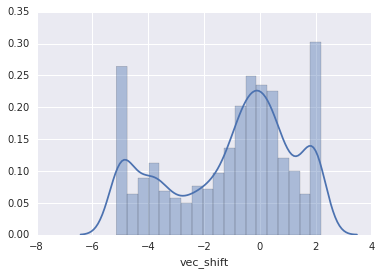

In [115]:
sns.distplot(np.log(load_shift_df(3).vec_shift))

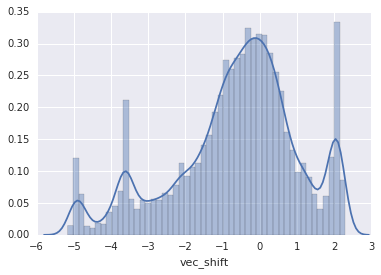

In [130]:
sns.distplot(np.log(load_shift_df(2).vec_shift))

In [131]:
tdf = load_shift_df(2)

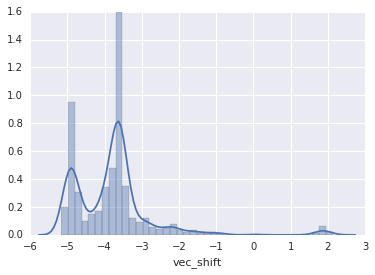

In [159]:
sns.distplot(np.log(tdf[tdf.length > 150].vec_shift))

In [216]:
tdf98 = load_shift_df(98)

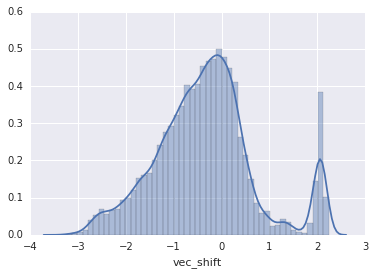

In [217]:
sns.distplot(np.log(tdf98[tdf98.length <= 100].vec_shift))

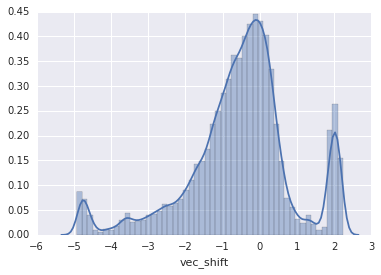

In [218]:
sns.distplot(np.log(tdf98.vec_shift))

In [219]:
gm = GM(n_components=2).fit(np.asmatrix(np.log(tdf98.vec_shift)).T)

In [220]:
print gm.means_
print gm.covariances_
print gm.weights_

[[-2.09300427]
 [-0.17603175]]
[[[ 3.00010579]]

 [[ 1.11006027]]]
[ 0.18934765  0.81065235]


In [225]:
gm = GM(n_components=2).fit(np.asmatrix(np.log(tdf98[tdf98.length <= 100].vec_shift)).T)

In [226]:
print gm.means_
print gm.covariances_
print gm.weights_

[[-0.05771774]
 [-0.55351544]]
[[[ 1.74131247]]

 [[ 0.49391874]]]
[ 0.43326654  0.56673346]


In [253]:
x = tdf98[tdf98.length<100].vec_shift

In [254]:
gm = GM(n_components=2).fit(np.asmatrix(np.log(x)).T)

In [255]:
gm.weights_

array([ 0.43179236,  0.56820764])

In [256]:
from scipy import stats

In [257]:
xs = np.linspace(-4, 3, 100)

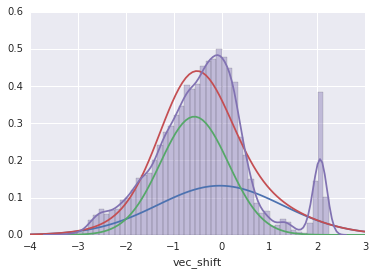

In [258]:
ys1 = stats.norm.pdf(xs, gm.means_[0], np.sqrt(gm.covariances_[0][0][0])) * gm.weights_[0]
ys2 = stats.norm.pdf(xs, gm.means_[1], np.sqrt(gm.covariances_[1][0][0])) * gm.weights_[1]

plt.plot(xs, ys1)
plt.plot(xs, ys2)
plt.plot(xs, ys1 + ys2)
sns.distplot(np.log(tdf98[tdf98.length <= 100].vec_shift))

In [269]:
gm = GM(n_components=3, means_init=[[-4], [0],[4]]).fit(np.asmatrix(np.log(x)).T)

In [270]:
print gm.means_
print gm.covariances_
print gm.weights_

[[-2.28724037]
 [-0.41891087]
 [ 2.05645789]]
[[[ 0.11597787]]

 [[ 0.52744229]]

 [[ 0.00540446]]]
[ 0.05299655  0.87430391  0.07269954]


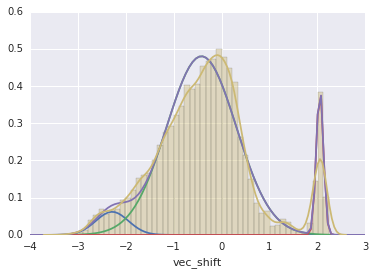

In [271]:
ys1 = stats.norm.pdf(xs, gm.means_[0], np.sqrt(gm.covariances_[0][0][0])) * gm.weights_[0]
ys2 = stats.norm.pdf(xs, gm.means_[1], np.sqrt(gm.covariances_[1][0][0])) * gm.weights_[1]
ys3 = stats.norm.pdf(xs, gm.means_[2], np.sqrt(gm.covariances_[2][0][0])) * gm.weights_[2]

plt.plot(xs, ys1)
plt.plot(xs, ys2)
plt.plot(xs, ys3)
plt.plot(xs, ys1 + ys2 + ys3)
sns.distplot(np.log(tdf98[tdf98.length <= 100].vec_shift))

In [240]:
tdf832 = load_shift_df(832)

In [286]:
x = tdf832.vec_shift

In [287]:
gm = GM(n_components=3, means_init=[[-4], [0], [4]], max_iter=1000).fit(np.asmatrix(np.log(x)).T)

print gm.means_
print gm.covariances_
print gm.weights_

[[-2.36856636]
 [ 0.12176816]
 [ 2.12824324]]
[[[ 0.36398988]]

 [[ 0.59941875]]

 [[ 0.00200257]]]
[ 0.01084344  0.97813206  0.0110245 ]


In [288]:
ys0 = stats.norm.pdf(xs, gm.means_[0], np.sqrt(gm.covariances_[0][0][0])) * gm.weights_[0]
ys1 = stats.norm.pdf(xs, gm.means_[1], np.sqrt(gm.covariances_[1][0][0])) * gm.weights_[1]
ys2 = stats.norm.pdf(xs, gm.means_[2], np.sqrt(gm.covariances_[2][0][0])) * gm.weights_[2]

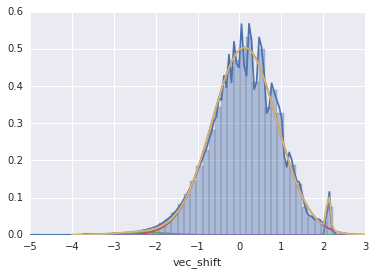

In [290]:
sns.distplot(np.log(x))

plt.plot(xs, ys0)
plt.plot(xs, ys1)
plt.plot(xs, ys2)
plt.plot(xs, ys0 + ys1 + ys2)

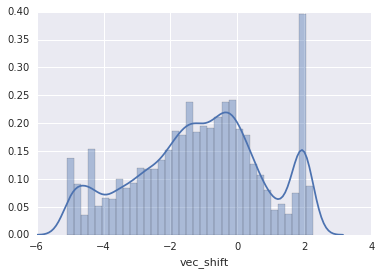

In [291]:
sns.distplot(np.log(load_shift_df(25).vec_shift))

In [370]:
def do_gm(logx, means=[-4,0,4]):
    gm = GM(n_components=len(means), means_init=np.matrix(means).T).fit(np.asmatrix(logx).T)
    print gm.means_
    print gm.covariances_
    print gm.weights_
    xs = np.linspace(-5, 3, 200)
    ys = np.zeros(200)
    for i in range(len(means)):
        tmp_ys = stats.norm.pdf(xs, gm.means_[i], np.sqrt(gm.covariances_[i][0][0])) * gm.weights_[i]
        ys += tmp_ys
        plt.plot(xs, tmp_ys)
    
    plt.plot(xs, ys)
    sns.distplot(logx)


In [373]:
def pltid(emojiId):
    df = pd.read_csv("svr/vec_shift/win_log_line2/%d" % emojiId, sep=" ", header=None).drop(0, axis=1)
    df.columns = ['length', 'cnt', 'vec_shift']
    x = df.vec_shift
    do_gm(np.log(x))

[[-4.49668552]
 [-2.48246886]
 [ 1.8770555 ]]
[[[  1.49245229e-02]]

 [[  2.41230928e+00]]

 [[  2.18668335e-03]]]
[ 0.23672196  0.31441889  0.44885915]


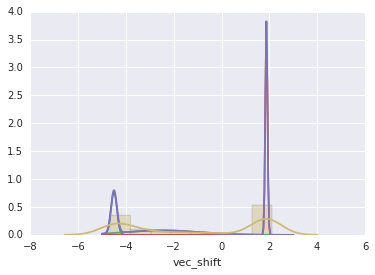

In [374]:
pltid(632)

[[-3.51087717]
 [-0.36823691]
 [ 2.03899167]]
[[[ 0.60562846]]

 [[ 0.98687913]]

 [[ 0.00447069]]]
[ 0.15686585  0.48435797  0.35877618]


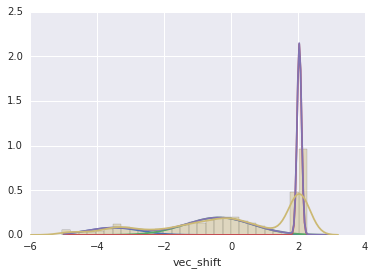

In [375]:
pltid(892)

[[-3.62542408]
 [-0.17966836]
 [ 1.91161888]]
[[[  1.30060912e+00]]

 [[  1.19642233e+00]]

 [[  1.24061031e-03]]]
[ 0.31641274  0.34902411  0.33456315]


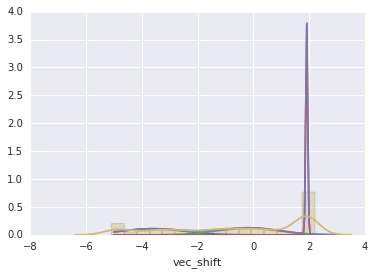

In [376]:
pltid(454)

[[-3.97587475]
 [-1.02890895]
 [ 1.90454676]]
[[[  9.65642640e-01]]

 [[  1.49332602e+00]]

 [[  1.36723645e-03]]]
[ 0.19079207  0.50845398  0.30075394]


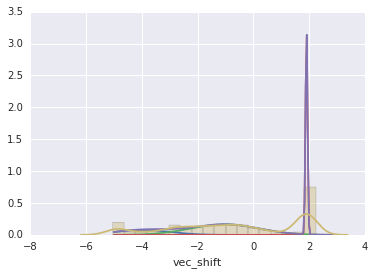

In [377]:
pltid(284)

[[-3.92740014]
 [-0.51849481]
 [ 1.95339304]]
[[[ 0.84899846]]

 [[ 0.95142071]]

 [[ 0.00421364]]]
[ 0.09826706  0.7039804   0.19775254]


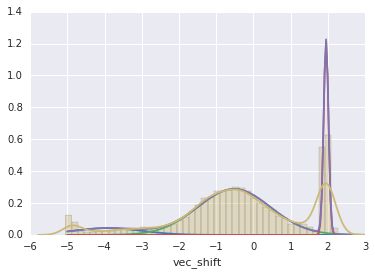

In [378]:
pltid(473)

[[-3.70836583]
 [-1.08169664]
 [ 1.91260894]]
[[[ 1.14181715]]

 [[ 1.79541698]]

 [[ 0.00194666]]]
[ 0.26497901  0.41881672  0.31620427]


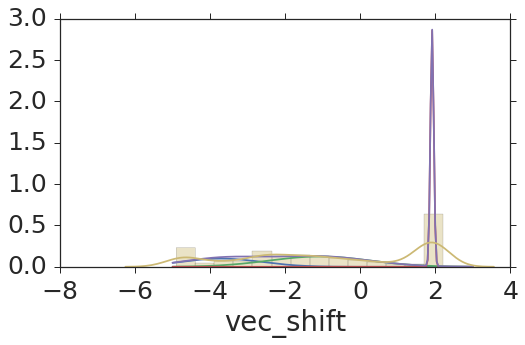

In [532]:
pltid(274)

[[-2.71027712]
 [-0.40271853]
 [ 1.97346565]]
[[[ 1.75319706]]

 [[ 1.09100538]]

 [[ 0.00803063]]]
[ 0.30259071  0.46832982  0.22907947]


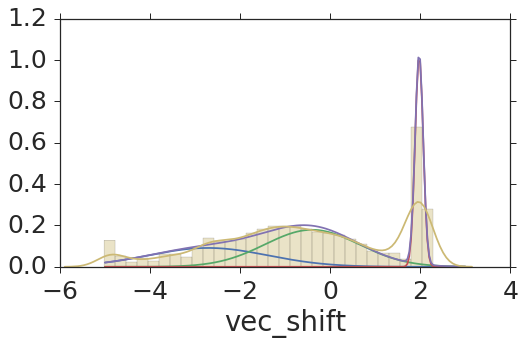

In [533]:
pltid(267)

In [ ]:
pltid(144)

## do this for all emojis

In [468]:
def load_df(embedding):
    distDF = pd.read_csv("svr/emoji_stats/dist/" + embedding, sep="\t")
    freqDF = pd.read_csv("svr/emoji_stats/freq/" + embedding, sep="\t")

    df = distDF.merge(freqDF, left_on="neighbor_id", right_on="token_id")\
        .drop("token_id", axis=1).rename(columns={'count': 'neighbor_freq'})\
        .groupby(['emoji_id', 'neighbor_type'])\
        .agg({'distance':['min', 'mean', 'max'], 
              'neighbor_freq':['min', 'mean', 'max']})\
        .reset_index().pivot(index = 'emoji_id', columns = 'neighbor_type')

    df.columns = ['dist_min_emoji', 'dist_min_emoticon', 'dist_min_word',
                  'dist_avg_emoji', 'dist_avg_emoticon', 'dist_avg_word',
                  'dist_max_emoji', 'dist_max_emoticon', 'dist_max_word',
                  'freq_min_emoji', 'freq_min_emoticon', 'freq_min_word',
                  'freq_avg_emoji', 'freq_avg_emoticon', 'freq_avg_word',
                  'freq_max_emoji', 'freq_max_emoticon', 'freq_max_word']

    df = df.reset_index().merge(freqDF, left_on='emoji_id', right_on='token_id').drop('token_id', axis=1)\
        .rename(columns={'count': 'emoji_freq'})

    df['logfreq_emoji'] = np.log(df.emoji_freq)

    egoDF = pd.read_csv("svr/emoji_stats/ego10/" + embedding, sep = "\t")
    egoDF.columns = ['emoji_id', 'degree', 'lcc']
    df = df.merge(egoDF,on='emoji_id')
    
    for col in ['freq_min_emoji', 'freq_min_emoticon', 'freq_min_word',
            'freq_avg_emoji', 'freq_avg_emoticon', 'freq_avg_word',
            'freq_max_emoji', 'freq_max_emoticon', 'freq_max_word']:
        df['log' + col] = np.log(df[col])
    
    return df

In [469]:
statsdf = load_df("win_log_line2")

In [536]:
newdf = pd.read_csv("svr/emoji_stats/supp/win_log_line2", sep="\t")

In [550]:
newdf[(newdf.mean2<1.9) & (newdf.n_dist>5000)]

emoji_id  n_dist     mean0     mean1     mean2      var0      var1  \
99        109    5516 -3.775282 -0.606536  1.880943  1.052431  1.242992   
117       127    5161 -4.697359 -1.332731  1.897556  0.021072  2.246526   
271       282    5190 -3.275345 -0.611533  1.889607  1.406675  2.584318   
272       283    6154 -3.392287 -0.695388  1.897480  1.629624  1.641498   
279       290    5161 -3.433896  0.141939  1.892339  1.558362  1.459670   
280       291   21935 -3.060741 -0.339428  1.896575  2.131065  1.174539   
281       292    5136 -4.643992 -2.081180  1.891417  0.006196  1.665684   
284       295    7771 -3.544127 -0.879091  1.896868  1.414319  1.770661   
352       366    5193 -4.403648 -0.824808  1.895258  0.354069  1.788902   
354       368    5229 -4.541045 -0.688488  1.886053  0.265053  1.754397   
391       415    8479 -3.774000 -0.685296  1.896981  0.918864  1.290624   
393       417    6342 -3.333362 -0.434090  1.879585  0.549305  1.644313   
395       419    5196 -4.316054 -1.533976  1.865223  0.156040  2.141953   
397       421    6404 -3.967561 -1.256837  1.880224  0.721149  1.603219   
398       422    7045 -3.287001 -0.786850  1.893155  1.496036  0.980798   
399       423    6344 -3.612646 -0.585743  1.875395  1.338940  1.105694   
400       424   10088 -3.181232 -0.622117  1.885961  1.521193  0.928933   
404       428    5018 -4.260194 -1.608244  1.863066  0.348474  2.330162   
405       429    8121 -3.378642 -0.715074  1.889934  1.384420  0.920280   
411       437  146584 -1.078468 -0.173939  0.161300  0.370445  0.148553   
412       438  127803 -3.105798 -0.270422  0.000009  0.338841  1.250331   
414       440  135287 -1.026612 -0.167422  0.328632  0.344783  0.154232   
415       441   85431 -1.388599 -0.055586 -0.000439  1.545150  1.397937   
614       640    5732 -3.238306 -1.200802  1.890993  1.560217  1.295355   
623       649    8089 -2.810316 -1.467508  1.896876  1.067897  1.308650   
642       668    6379 -4.766451 -1.127013  1.897761  0.014985  2.258041   
710       736    5451 -4.404962 -0.918246  1.893258  0.218850  1.253408   
786       825    7057 -4.337575 -1.293827  1.881759  0.430110  1.887156   
787       826    7463 -4.392625 -1.221990  1.892986  0.364501  1.982929   
790       829    5977 -4.232615 -0.240002  1.870314  0.819802  1.328530   
889       928    5338 -4.783680 -1.074197  1.894064  0.003701  2.480465   
896       935    5277 -4.857476 -1.337417  1.894337  0.003925  2.424970   
905       944    5948 -4.433150 -0.833746  1.892051  0.259674  1.143188   
921       960    5554 -4.707091 -0.905090  1.883540  0.058376  1.806896   

         var2        w0        w1        w2  
99   0.007673  0.431202  0.317410  0.251387  
117  0.003156  0.117223  0.614042  0.268735  
271  0.000816  0.482469  0.142084  0.375448  
272  0.001023  0.384566  0.221910  0.393523  
279  0.000975  0.489404  0.138134  0.372461  
280  0.000795  0.128669  0.778417  0.092914  
281  0.001001  0.139232  0.462813  0.397955  
284  0.001273  0.256282  0.471905  0.271814  
352  0.007086  0.276489  0.527631  0.195881  
354  0.006518  0.246621  0.582189  0.171190  
391  0.007183  0.414707  0.414673  0.170620  
393  0.008029  0.589917  0.249308  0.160776  
395  0.005593  0.324507  0.463038  0.212455  
397  0.006938  0.323984  0.413027  0.262989  
398  0.009842  0.483449  0.248086  0.268465  
399  0.007775  0.462607  0.266835  0.270558  
400  0.007488  0.434711  0.382090  0.183199  
404  0.004993  0.306512  0.435799  0.257689  
405  0.009125  0.430773  0.355001  0.214226  
411  2.939235  0.236115  0.473294  0.290591  
412  0.000004  0.020169  0.979831  0.000000  
414  2.797125  0.254251  0.410813  0.334936  
415  0.000005  0.026146  0.973854  0.000000  
614  0.003338  0.385295  0.401143  0.213562  
623  0.003925  0.403969  0.440700  0.155331  
642  0.003880  0.095373  0.682637  0.221990  
710  0.007429  0.241605  0.579927  0.178468  
786  0.006173  0.242130  0.525009  0.232861  
787  0.007561  0.223130  0.542513  0.234358  

In [471]:
newdf = statsdf.merge(newdf[['emoji_id', 'n_dist', 'w2']])

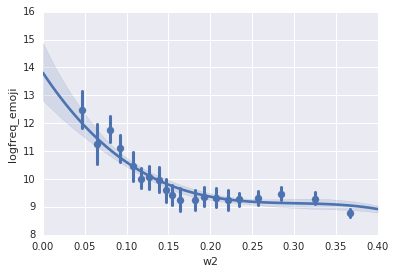

In [473]:
f, ax = plt.subplots()
sns.regplot('w2', 'logfreq_emoji', newdf, ax=ax, x_bins=20, order=3)
f.savefig('svr/html/supp/corr.png')

In [474]:
fout = open("svr/html/supp/win_log_line2.html", "w")

fout.write('''\
<!DOCTYPE html>
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>
<script src="http://code.jquery.com/jquery-1.7.2.min.js"></script>
<style>
td {
    height: 24px;
    width: 40px;
    padding-left: 5px;
    padding-right: 5px;
    padding-top: 0px;
    padding-bottom: 0px;
}
img {
    width: 20px;
    height: 20px;
}
</style>
</head>
<body>

Correlation between component weight and usage frequency is shown as follows:

<br/>

<img style="width:400px;height:300px" src="corr.png">

<table cellspacing="0" cellpadding="0" border="0">
<tr>
  <td>weight</td>
  <td>EmojiID</td>
<tr>
''')

for r in newdf.sort_values(by='w2', ascending=True).iterrows():
    fout.write('<tr><td>%f</td><td>%d</td><td><img src=resource/icons/%d.png></td></tr>\n' % 
               (r[1].w2, r[1].emoji_id, r[1].emoji_id))

fout.write('''\
</table></body></html>
''')

fout.close()

# Plot

In [478]:
import matplotlib
matplotlib.rcParams.update({'font.size': 2})
matplotlib.rcParams.update({'figure.autolayout': True})
sns.set(font_scale=2.5)
sns.set_style("ticks")

In [555]:
df496 = pd.read_csv("svr/s3/vec_shift/win_log_line2/496", sep = " ", header = None).drop(0, axis=1)
df496.columns = ['length', 'cnt', 'uniqEmoji', 'origNorm', 'newNorm', 'shiftDist']

In [556]:
gm = GM(n_components=3, means_init=[[-1.737], [0], [1.737]]).fit(np.asmatrix(np.log10(df496.shiftDist)).T)
print gm.weights_

[ 0.06333274  0.81899531  0.11767195]


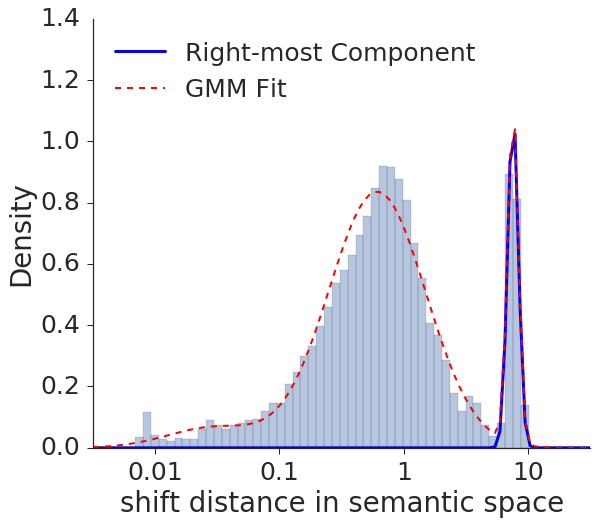

In [568]:
f, ax = plt.subplots(figsize=(9, 8))

sns.distplot(np.log10(df496.shiftDist), ax=ax, norm_hist=True, kde=False)
xs = np.linspace(-2.5, 1.5, 100)
ys = np.zeros(100)
for i in range(3):
    tmp_ys = stats.norm.pdf(xs, gm.means_[i], np.sqrt(gm.covariances_[i][0][0])) * gm.weights_[i]
    ys += tmp_ys
plt.plot(xs, tmp_ys, 'b', lw=3, label="Right-most Component")
plt.plot(xs, ys, 'r--', lw=2, label="GMM Fit")
plt.legend(loc=2)
sns.despine()
ax.set_xlim((-2.5, 1.5))
ax.set_ylim((0, 1.4))
ax.set_xticks([-2, -1, 0, 1])
ax.set_xticklabels(["0.01", "0.1", "1", "10"])
ax.set_xlabel("shift distance in semantic space")
ax.set_ylabel("Density")
f.savefig("fig/vec-shift-496.pdf")

In [523]:
df832 = pd.read_csv("svr/s3/vec_shift/win_log_line2/832", sep = " ", header = None).drop(0, axis=1)
df832.columns = ['length', 'cnt', 'uniqEmoji', 'origNorm', 'newNorm', 'shiftDist']

In [524]:
gm832 = GM(n_components=3, means_init=[[-1.737], [0], [1.737]]).fit(np.asmatrix(np.log10(df832.shiftDist)).T)
print gm832.weights_

[ 0.02602456  0.960693    0.01328244]


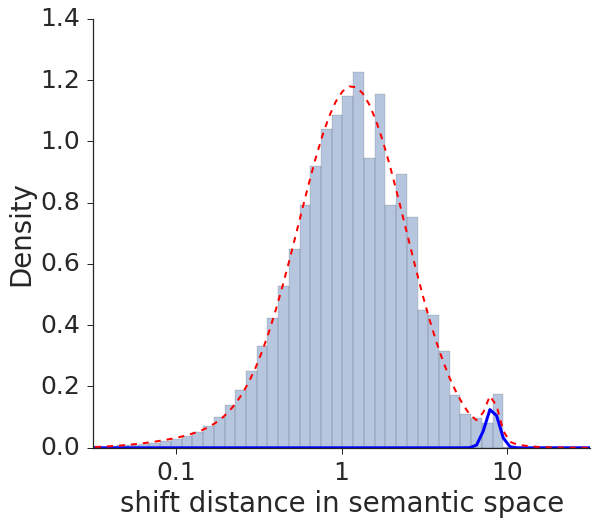

In [567]:
f, ax = plt.subplots(figsize=(9, 8))

sns.distplot(np.log10(df832.shiftDist), ax=ax, norm_hist=True, kde=False)
xs = np.linspace(-2.5, 1.5, 100)
ys = np.zeros(100)
for i in range(3):
    tmp_ys = stats.norm.pdf(xs, gm832.means_[i], np.sqrt(gm832.covariances_[i][0][0])) * gm832.weights_[i]
    ys += tmp_ys
plt.plot(xs, tmp_ys, 'b', lw=3, label="Right-most Component")
plt.plot(xs, ys, 'r--', lw=2, label="GMM Fit")
#plt.legend(loc = 1)
sns.despine()
ax.set_xlim((-1.5, 1.5))
#ax.set_ylim((3, 6))
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(["0.1", "1", "10"])
ax.set_xlabel("shift distance in semantic space")
ax.set_ylabel("Density")
f.savefig("fig/vec-shift-832.pdf")

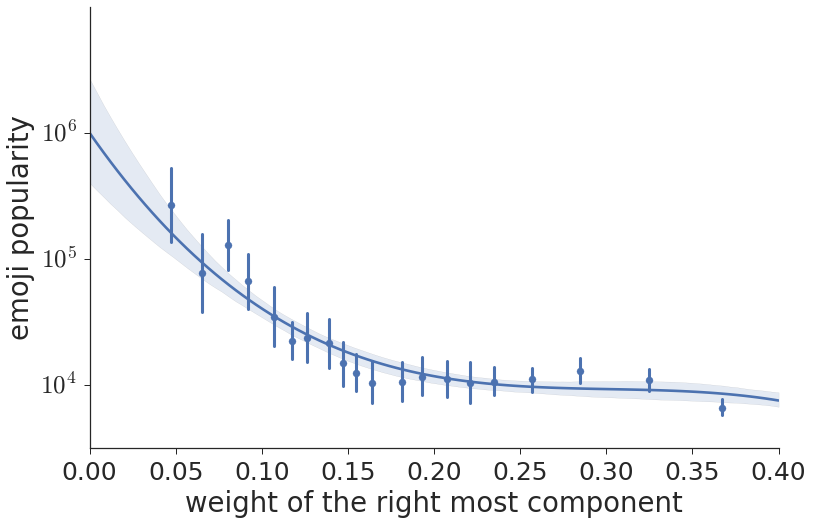

In [590]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot('w2', 'logfreq_emoji', newdf, ax=ax, x_bins=20, order=3)
sns.despine()
ax.set_xlabel("weight of the right most component")
ax.set_ylabel("emoji popularity")
ax.set_yticks([4, 5, 6])
ax.set_yticklabels(['$10^4$', '$10^5$', '$10^6$'])
f.savefig("fig/shift-corr.pdf")

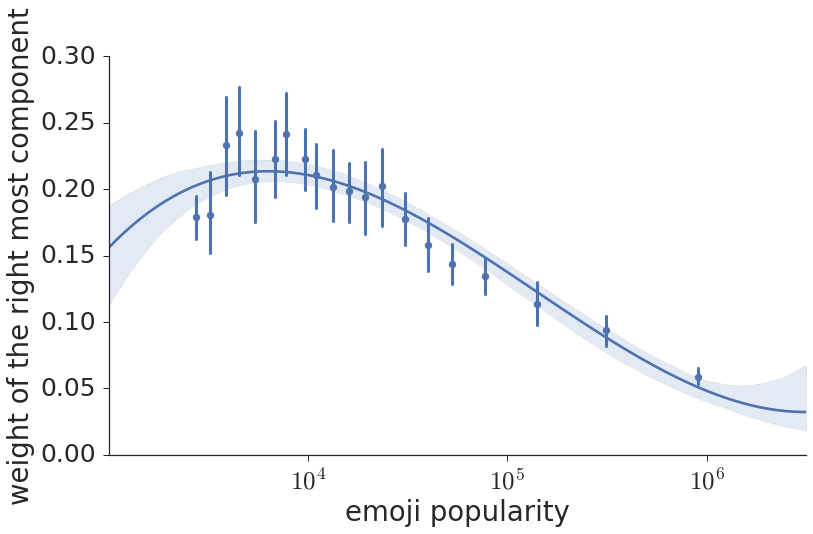

In [591]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot('logfreq_emoji', 'w2',  newdf, ax=ax, x_bins=20, order=3)
sns.despine()
ax.set_ylabel("weight of the right most component")
ax.set_xlabel("emoji popularity")
ax.set_xticks([4, 5, 6])
ax.set_xticklabels(['$10^4$', '$10^5$', '$10^6$'])
#f.savefig("fig/shift-corr.pdf")

In [593]:
fout = open("svr/html/supp/eid.html", "w")

fout.write('''\
<!DOCTYPE html>
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>
<script src="http://code.jquery.com/jquery-1.7.2.min.js"></script>
<style>
td {
    height: 24px;
    width: 40px;
    padding-left: 5px;
    padding-right: 5px;
    padding-top: 0px;
    padding-bottom: 0px;
}
img {
    width: 20px;
    height: 20px;
}
</style>
</head>
<body>

Correlation between component weight and usage frequency is shown as follows:

<br/>

<table cellspacing="0" cellpadding="0" border="0">
<tr>
  <td>logfreq</td>
  <td>EmojiID</td>
<tr>
''')

for r in newdf.sort_values(by='emoji_id', ascending=True).iterrows():
    fout.write('<tr><td>%f</td><td>%d</td><td><img src=resource/icons/%d.png></td></tr>\n' % 
               (r[1].logfreq_emoji, r[1].emoji_id, r[1].emoji_id))

fout.write('''\
</table></body></html>
''')

fout.close()